### Problem 1: 

You are hired by one of the leading news channel CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

#### Dataset for Problem: Election_Data.xlsx




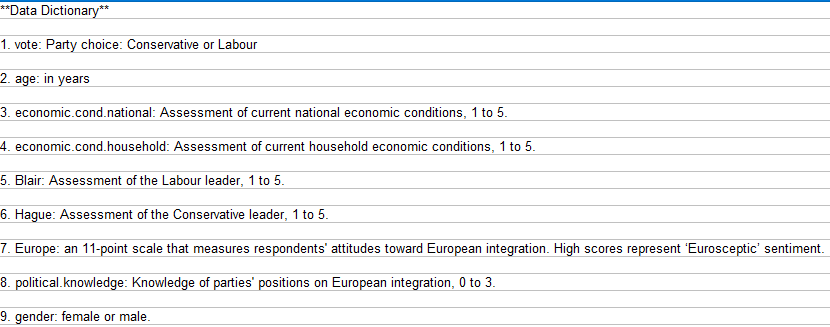











In [209]:
#Importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
# Import stats from scipy
from scipy import stats
  
import matplotlib.style

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor # for calculating VIF

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Importing various classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


## Question 1.1) Read the dataset. Do the descriptive statistics and do null value condition check. Write an inference on it.


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Answer 1.1:
    
### Performing Basic Data Exploration:
In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:

- Head of the dataset
- Shape of the dataset
- Info of the dataset
- Summary of the dataset

**We will  be loading the given Data file using pandas.**
    


In [3]:
df=pd.read_excel('Election_Data.xlsx', sheet_name = 1)   # 0 means 1 st sheet, 1 means 2nd sheet

In [4]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


**Head function will tell the top records in the data set. By default python shows you only top 5 records.**

#### Dropping the 'Unnamed' column as it is not usefull for the model.

In [5]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [6]:
print('The number of rows of the dataframe is',df.shape[0],'.')

print('The number of columns of the dataframe is',df.shape[1],'.')

The number of rows of the dataframe is 1525 .
The number of columns of the dataframe is 9 .


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


**info() is being used to check the Information about the data and the data types of each respective attributes.**

**The following are the observation:**
- Total of 9 variables
- Except Age, all other variables are object variables with different levels.
- Age is numeric variable


In [8]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

**There is no missing value in the dataset**

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


#### Except Age, all other variables are categorical (object) variables with different labels..

### Checking for any kind of special values like " ? ", any string Or  any negative number etc. in the variables

In [10]:
for column in df.columns:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


AGE :  70
93     1
90     1
91     1
92     2
87     3
      ..
46    37
47    38
35    39
49    39
37    42
Name: age, Length: 70, dtype: int64


ECONOMIC.COND.NATIONAL :  5
1     37
5     82
2    257
4    542
3    607
Name: economic.cond.national, dtype: int64


ECONOMIC.COND.HOUSEHOLD :  5
1     65
5     92
2    280
4    440
3    648
Name: economic.cond.household, dtype: int64


BLAIR :  5
3      1
1     97
5    153
2    438
4    836
Name: Blair, dtype: int64


HAGUE :  5
3     37
5     73
1    233
4    558
2    624
Name: Hague, dtype: int64


EUROPE :  11
2      79
7      86
10    101
1     109
9     111
8     112
5     124
4     127
3     129
6     209
11    338
Name: Europe, dtype: int64


POLITICAL.KNOWLEDGE :  4
1     38
3    250
0    455
2    782
Name: political.knowledge, dtype: int64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64




#### There is no special character or -ve value in the variables.

### Checking for duplicate data :

In [11]:
dups = df.duplicated()
print("No. of duplicate rows in our data",dups.sum())
df[dups]

No. of duplicate rows in our data 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


#### It shows that there is 8 duplicate data. We will discard the duplicate data as the number of entries are small compared to total entries.

In [12]:
print('Before',df.shape)
df.drop_duplicates(inplace=True)
print('After',df.shape)

Before (1525, 9)
After (1517, 9)


## Question 1.2) Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Answer 1.2:



## Uni-variate analysis

### Numerical variables

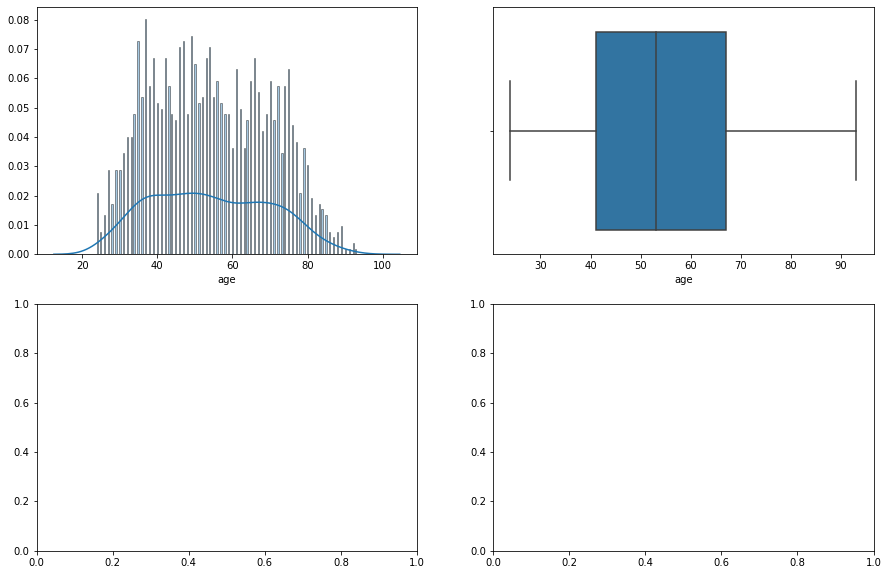

In [13]:
fig, axs=plt.subplots(nrows= 2, ncols= 2, figsize=(15,10))
sns.distplot(df['age'], bins= 200, hist_kws=dict(ec='black'), ax=axs[0][0])
#sns.distplot(df['Blair'], bins= 100, hist_kws=dict(ec='black'), ax=axs[1][0], color='magenta')

sns.boxplot(df['age'], ax=axs[0][1])
#sns.boxplot(df['Blair'], ax=axs[1][1], color='magenta')

plt.show()

#### There are  no outliers in the numerical variables 'age'. 


### Categorical variables (Bi-variate Analysis)

In [14]:
df.vote.value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

### Out of total votes, around 70% belong to Labour party, 30% belong to Conservative party

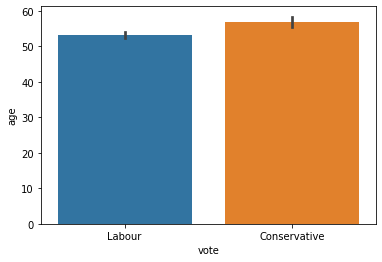

In [15]:
sns.barplot(x ='vote',y ='age',data= df)

### Age does not have any significant relation to the vote for any particular party.

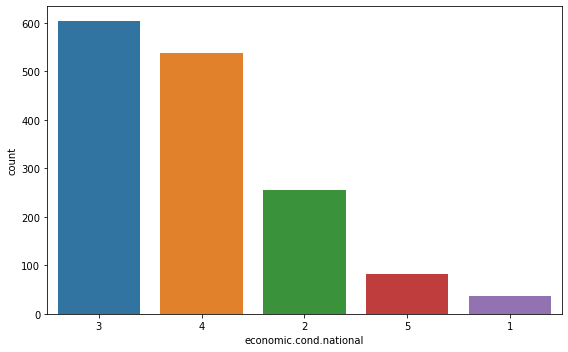

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x="economic.cond.national", data=df,order = df['economic.cond.national'].value_counts().index)
plt.tight_layout();

### In 'economic.cond.national',  Highest count belongs to 3rd category.

<Figure size 720x648 with 0 Axes>

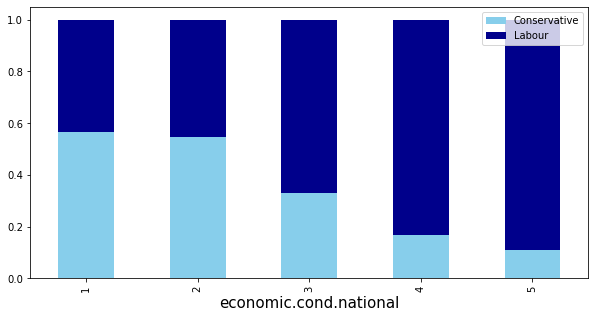

<Figure size 432x288 with 0 Axes>

In [17]:
plt.figure(figsize=(10,9))
data = pd.crosstab(df['economic.cond.national'], df['vote'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 5), color = ['skyblue', 'darkblue'])
#plt.title('economic.cond.national', fontsize = 15)
plt.xlabel('economic.cond.national', fontsize = 15)
plt.legend()
plt.show();
plt.tight_layout();

### In 'economic.cond.national', category '3', '4' and '5' are mostly biased for Labour party.

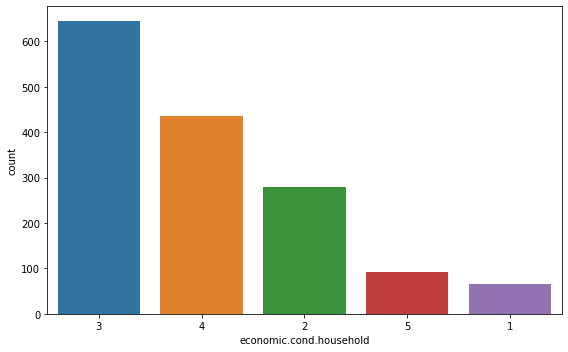

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(x="economic.cond.household", data=df,order = df['economic.cond.household'].value_counts().index)
plt.tight_layout();

### In 'economic.cond.household',  Highest count belongs to 3rd category.

<Figure size 720x648 with 0 Axes>

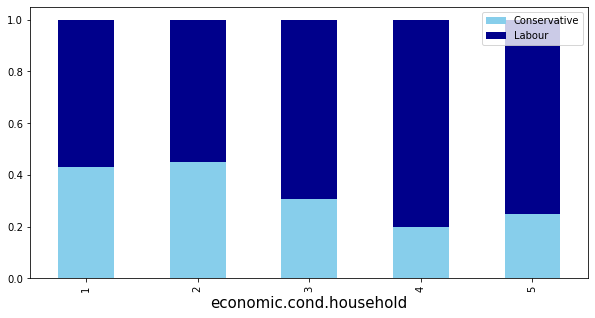

In [19]:
plt.figure(figsize=(10,9))
data = pd.crosstab(df['economic.cond.household'], df['vote'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 5), color = ['skyblue', 'darkblue'])
#plt.title('economic.cond.national', fontsize = 15)
plt.xlabel('economic.cond.household', fontsize = 15)
plt.legend()
plt.show();


### In 'economic.cond.household', all categories and specially '3', '4' and '5' are mostly biased for Labour party.

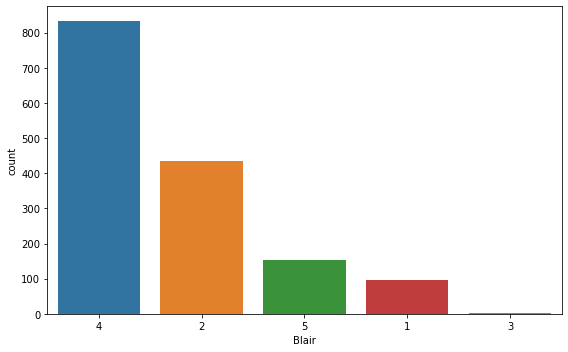

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(x="Blair", data=df,order = df['Blair'].value_counts().index)
plt.tight_layout();

### Blair has maximum assessment count at level 4.

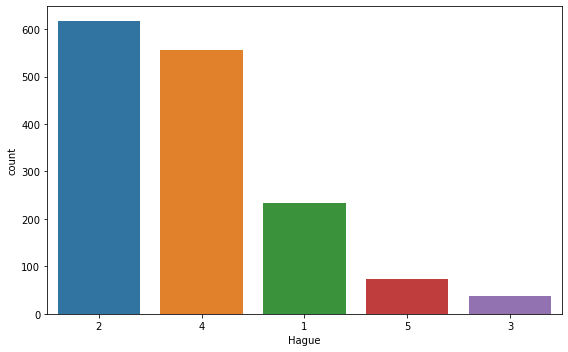

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x="Hague", data=df,order = df['Hague'].value_counts().index)
plt.tight_layout();

### Hague has maximum assessment count at level 2 followed by 4

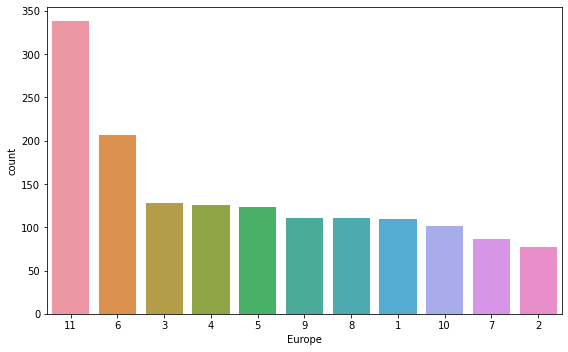

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(x="Europe", data=df,order = df['Europe'].value_counts().index)
plt.tight_layout();

### Most of the voters are having Eurosceptic sentiments (level 11). A significant portion has average sentiments (level 6) towards European integration.

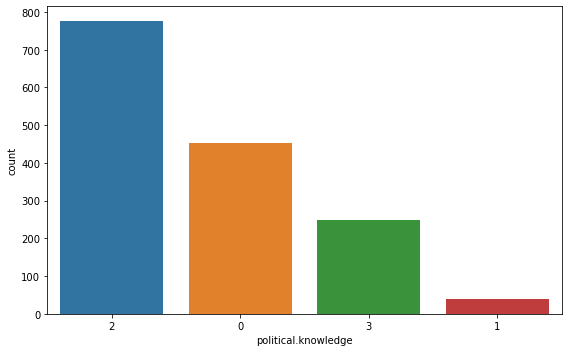

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(x="political.knowledge", data=df,order = df['political.knowledge'].value_counts().index)
plt.tight_layout();

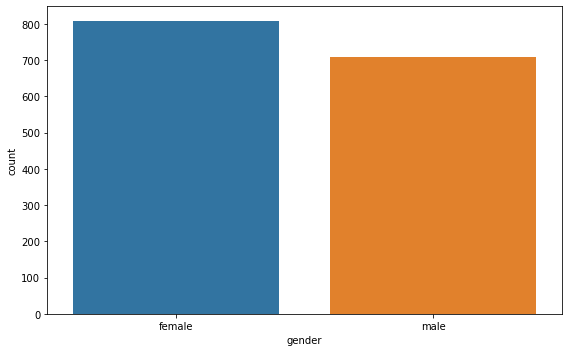

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(x="gender", data=df,order = df['gender'].value_counts().index)
plt.tight_layout();

<Figure size 720x648 with 0 Axes>

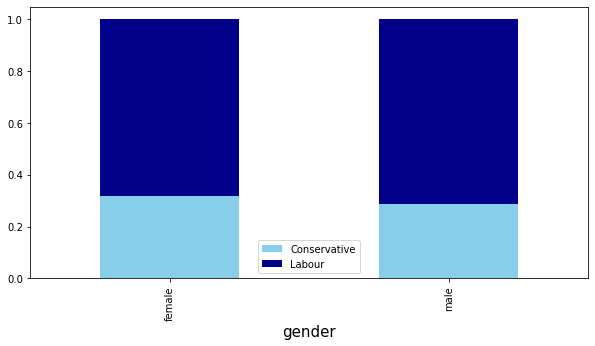

In [25]:
plt.figure(figsize=(10,9))
data = pd.crosstab(df['gender'], df['vote'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 5), color = ['skyblue', 'darkblue'])
#plt.title('gender', fontsize = 15)
plt.xlabel('gender', fontsize = 15)
plt.legend()
plt.show();


### Most of the voters are biased towards labour party across both gender segment.

### Data Distribution

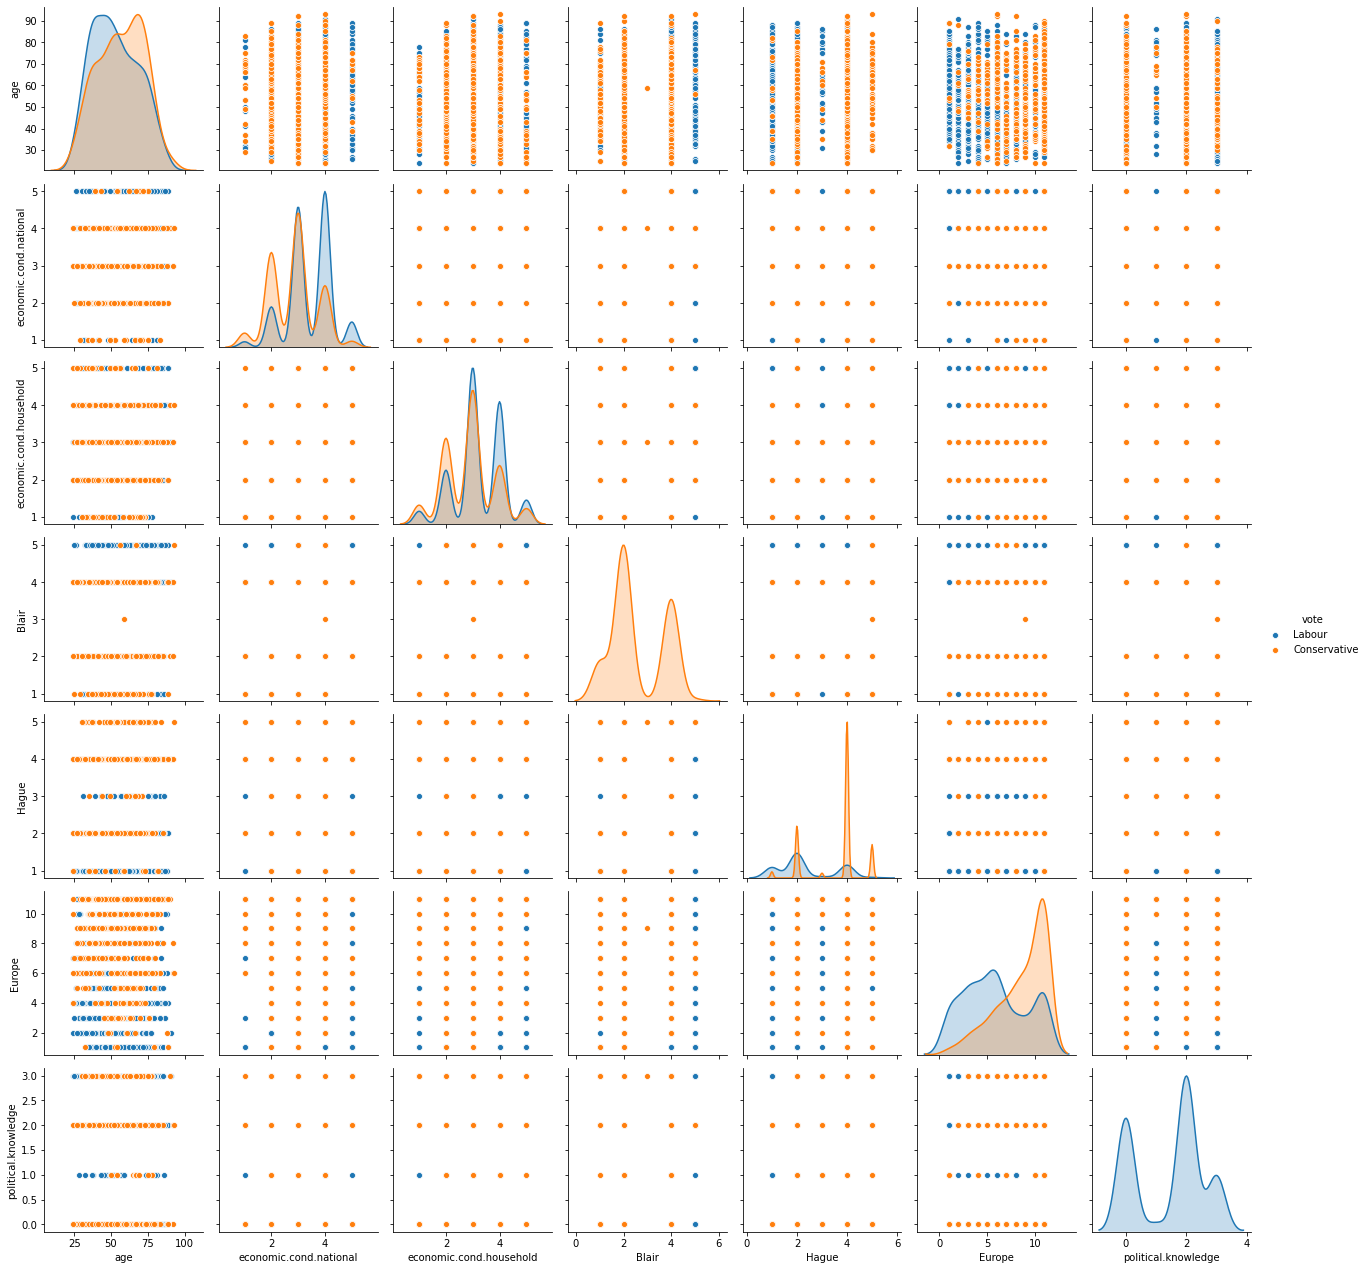

In [26]:
df_pair = df
sns.pairplot(df_pair, diag_kind='kde', hue='vote')  
plt.show()

#### Most of the variables are Categorical due to which the pair plots are discountinuos.

#### There are no outliers in numerical variable "age"..


### Observations/Inferences:

The following are the observation from basic descriptive stats:

- Total of 9 variables
- Except Age, all other variables are object variables with different levels.
- Age is numeric variable, and it does not have any outliers.
- There are 8 duplicate rows and was dropped for further analysis.
- There is no missing value in the dataset.
- There is no special character or -ve value in the variables.

#### Basic inferences on the variables and their significance,
- Out of total votes, around 70% belong to Labour party, 30% belong to Conservative party.
- Age does not have any significant relation to the vote for any particular party.
- Most of the voters are having Eurosceptic sentiments (level 11). A significant portion has average sentiments (level 6) towards European integration.
- Most of the voters are biased towards labour party across both gender segment.

## Question 1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30) 

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Answer 1.3:

#### Checking the datatypes and found that most of the categorical features are of int64 type. So, we have to convert the numerical types to object type except "age".
    


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 158.5+ KB


In [28]:
obj=['economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','gender']

In [29]:
for i in obj:
    df[i]=df[i].astype("object")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   object
 3   economic.cond.household  1517 non-null   object
 4   Blair                    1517 non-null   object
 5   Hague                    1517 non-null   object
 6   Europe                   1517 non-null   object
 7   political.knowledge      1517 non-null   object
 8   gender                   1517 non-null   object
dtypes: int64(1), object(8)
memory usage: 158.5+ KB


### Using get_dummies of the object variables

In [31]:
df =pd.get_dummies(df, columns=obj,drop_first=True)

In [32]:
df

,vote,age,economic.cond.national_2,economic.cond.national_3,economic.cond.national_4,economic.cond.national_5,economic.cond.household_2,economic.cond.household_3,economic.cond.household_4,economic.cond.household_5,...,Europe_6,Europe_7,Europe_8,Europe_9,Europe_10,Europe_11,political.knowledge_1,political.knowledge_2,political.knowledge_3,gender_male
0,Labour,43,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Labour,36,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
2,Labour,35,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,Labour,24,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Labour,41,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520,Conservative,67,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
1521,Conservative,73,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
1522,Labour,37,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1523,Conservative,61,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


#### Drop First is used to ensure that multiple columns created based on the levels of categorical variable are not included else it will result in to multicollinearity 

#### Here the Target column "vote" will be label encoded.

In [33]:
df["vote"] = pd.Categorical(df["vote"]).codes 


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   vote                       1517 non-null   int8 
 1   age                        1517 non-null   int64
 2   economic.cond.national_2   1517 non-null   uint8
 3   economic.cond.national_3   1517 non-null   uint8
 4   economic.cond.national_4   1517 non-null   uint8
 5   economic.cond.national_5   1517 non-null   uint8
 6   economic.cond.household_2  1517 non-null   uint8
 7   economic.cond.household_3  1517 non-null   uint8
 8   economic.cond.household_4  1517 non-null   uint8
 9   economic.cond.household_5  1517 non-null   uint8
 10  Blair_2                    1517 non-null   uint8
 11  Blair_3                    1517 non-null   uint8
 12  Blair_4                    1517 non-null   uint8
 13  Blair_5                    1517 non-null   uint8
 14  Hague_2                 

In [35]:
df["vote"].value_counts()

1    1057
0     460
Name: vote, dtype: int64

#### From the dataset it is quite evident that there is only one numerical variables, others are categorical variables with different levels. So, the categorical are assigned dummies for further analysis. Since there are no other numerical variables, scaling is not necessary.
#### Scaling would have been necessary for KNN algorithm if there would have been more than one numerical variable.
#### The fundamental reason why we need scaling is that the different independent variables have different scales e.g: age, height, weight etc. Some of the machine learning algorithms dont recognize the unit of data; Hence, it won't be prudent to compare age with a %age or height.

### Splitting data into training and test set

In [36]:
# Copy all the predictor variables into X dataframe
X = df.drop('vote', axis=1)

# Copy target into the y dataframe. 
y = df[['vote']]

#### We will split the dataset into 70% training data and 30% of testing data.

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.30, random_state = 5)

#### Checking the dimensions of the training and test data

In [38]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (1061, 31)
X_test (456, 31)
y_train (1061, 1)
y_test (456, 1)


## Question 1.4)  Apply Logistic Regression and LDA (Linear Discriminant Analysis). Interpret the inferences of both models.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Answer 1.4:

#### =======================================================================================
### Instantiating the Logistic Regression Model
#### =======================================================================================

In [39]:
# invoking the LogisticRegression function and find the bestfit model on training data

model_logistic = LogisticRegression(max_iter=1000)
model_logistic.fit(X_train, y_train)
y_train_predict = model_logistic.predict(X_train)
y_test_predict = model_logistic.predict(X_test)

### Checking the score of the model

In [40]:
model_logistic.score(X_train, y_train)

0.8595664467483506

In [41]:
model_logistic.score(X_test, y_test)

0.793859649122807

In [42]:
print ("Classification report for Training data")
print(classification_report(y_train, y_train_predict))

print ('\n')

print ("Classification report for Testing data")
print(classification_report(y_test, y_test_predict))

Classification report for Training data
              precision    recall  f1-score   support

           0       0.80      0.70      0.75       315
           1       0.88      0.93      0.90       746

    accuracy                           0.86      1061
   macro avg       0.84      0.81      0.83      1061
weighted avg       0.86      0.86      0.86      1061



Classification report for Testing data
              precision    recall  f1-score   support

           0       0.69      0.63      0.66       145
           1       0.83      0.87      0.85       311

    accuracy                           0.79       456
   macro avg       0.76      0.75      0.76       456
weighted avg       0.79      0.79      0.79       456



### Checking the coeffecients

In [167]:
model_logistic.coef_

array([[-2.15695925e-02, -3.68307085e-01,  7.82593175e-02,
         5.76204436e-01,  7.29533908e-01, -1.38046129e-01,
         2.30050766e-01,  4.22709210e-01, -3.32976750e-01,
        -5.48788051e-01, -1.43254549e-01,  1.03069020e+00,
         2.74725959e+00, -2.67126061e-01, -3.44190000e-01,
        -2.03430997e+00, -2.81974495e+00,  3.15207166e-01,
         4.86697056e-02, -1.94713224e-03, -1.65987108e-01,
         3.18864530e-01, -7.61280012e-01, -1.35429175e+00,
        -1.27801397e+00, -1.24758699e+00, -1.22224103e+00,
        -2.88111712e-01, -1.16433374e+00, -8.67581594e-01,
        -8.22898594e-02]])

In [168]:
odds = np.exp(model_logistic.coef_[0])
pd.DataFrame(odds, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
Blair_5,15.599823
Blair_4,2.803000
economic.cond.national_5,2.074114
economic.cond.national_4,1.779272
economic.cond.household_4,1.526090
Europe_6,1.375565
Europe_2,1.370543
economic.cond.household_3,1.258664
economic.cond.national_3,1.081403
Europe_3,1.049874


###  So, it is seen that for Logistic regression model, the train data accuracy is more than test data accuracy. This is an example of overfitting. So, we have to tune the model to get similar accuracy for both train and test data.

#### =======================================================================================
### Instantiating the Linear Discriminant Analysis Model
#### =======================================================================================

In [43]:
LDA = LinearDiscriminantAnalysis()
model_LDA=LDA.fit(X_train,y_train)
model_LDA

LinearDiscriminantAnalysis()

In [44]:
model_LDA.score(X_train,y_train)

0.8539114043355325

In [45]:
model_LDA.score(X_test,y_test)

0.7982456140350878

In [46]:
pred_y_train=model_LDA.predict(X_train)
pred_y_test=model_LDA.predict(X_test)

In [47]:
print ("Classification report for Training data")
print(classification_report(y_train,pred_y_train))

print ('\n')

print ("Classification report for Testing data")
print(classification_report(y_test, pred_y_test))

Classification report for Training data
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       315
           1       0.89      0.91      0.90       746

    accuracy                           0.85      1061
   macro avg       0.83      0.82      0.82      1061
weighted avg       0.85      0.85      0.85      1061



Classification report for Testing data
              precision    recall  f1-score   support

           0       0.69      0.66      0.68       145
           1       0.85      0.86      0.85       311

    accuracy                           0.80       456
   macro avg       0.77      0.76      0.76       456
weighted avg       0.80      0.80      0.80       456



In [200]:
model_LDA.coef_[0]

array([-0.02816114, -0.10845107,  0.55335789,  1.07013956,  1.16005919,
       -0.24835383,  0.17815392,  0.40505972, -0.56984571, -0.20489324,
       -0.8189353 ,  2.03406403,  3.08961416, -0.39521504, -0.52718704,
       -2.78478953, -4.44335406, -0.42316393, -0.66685514, -0.82578157,
       -0.84847906, -0.53058382, -1.63020674, -2.54781558, -2.58064155,
       -2.58593501, -2.32161351, -0.35282358, -1.6440472 , -1.32558977,
       -0.10435575])

In [201]:
pd.DataFrame(model_LDA.coef_[0], 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
Blair_5,3.089614
Blair_4,2.034064
economic.cond.national_5,1.160059
economic.cond.national_4,1.070140
economic.cond.national_3,0.553358
economic.cond.household_4,0.405060
economic.cond.household_3,0.178154
age,-0.028161
gender_male,-0.104356
economic.cond.national_2,-0.108451


### So, it is seen that for LDA model also, the train data accuracy is more than test data accuracy. so, there is an overfitting. So, we have to tune the model to get similar accuracy for both test and train data.

### So, for both the models, the accuracy, F1 score, Precision and Recall values are quite comparable for both datasets.

## Question 1.5)  Apply KNN Model and Naïve Bayes Model. Interpret the inferences of each model.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Answer 1.5:

#### =======================================================================================
### Instantiating KNN Model
#### =======================================================================================

In [48]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [49]:
y_train_predict = KNN_model.predict(X_train)
y_test_predict = KNN_model.predict(X_test)

In [50]:
KNN_model.score(X_train,y_train)

0.8454288407163054

In [51]:
KNN_model.score(X_test,y_test)

0.7368421052631579

In [52]:
print ("Classification report for Training data")
print(classification_report(y_train,y_train_predict))

print ('\n')

print ("Classification report for Testing data")
print(classification_report(y_test, y_test_predict))

Classification report for Training data
              precision    recall  f1-score   support

           0       0.80      0.63      0.71       315
           1       0.86      0.93      0.89       746

    accuracy                           0.85      1061
   macro avg       0.83      0.78      0.80      1061
weighted avg       0.84      0.85      0.84      1061



Classification report for Testing data
              precision    recall  f1-score   support

           0       0.63      0.42      0.50       145
           1       0.77      0.88      0.82       311

    accuracy                           0.74       456
   macro avg       0.70      0.65      0.66       456
weighted avg       0.72      0.74      0.72       456



### So, it is seen that for KNN model, the train data accuracy is more than test data accuracy. so, there is an overfitting. So, we have to tune the model to get similar accuracy for both test and train data.

#### =======================================================================================
### Instantiating Gaussian Naïve Bayes Model
#### =======================================================================================

In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [54]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [55]:
y_train_predict = NB_model.predict(X_train)
y_test_predict = NB_model.predict(X_test)

In [56]:
NB_model.score(X_train,y_train)

0.8152686145146089

In [57]:
NB_model.score(X_test,y_test)

0.7521929824561403

In [58]:
print ("Classification report for Training data")
print(classification_report(y_train,y_train_predict))

print ('\n')

print ("Classification report for Testing data")
print(classification_report(y_test, y_test_predict))

Classification report for Training data
              precision    recall  f1-score   support

           0       0.69      0.68      0.69       315
           1       0.87      0.87      0.87       746

    accuracy                           0.82      1061
   macro avg       0.78      0.78      0.78      1061
weighted avg       0.81      0.82      0.81      1061



Classification report for Testing data
              precision    recall  f1-score   support

           0       0.62      0.58      0.60       145
           1       0.81      0.83      0.82       311

    accuracy                           0.75       456
   macro avg       0.71      0.71      0.71       456
weighted avg       0.75      0.75      0.75       456



### So, it is seen that for Naïve Bayes model, the train data accuracy is more than test data accuracy. so, there is an overfitting. So, we have to tune the model to get similar accuracy for both test and train data.

### So, for both the models, the accuracy, F1 score, Precision and Recall values are quite comparable for both datasets.

## Question 1.6)  Model Tuning, Bagging (Random Forest should be applied for Bagging) and Boosting.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Answer 1.6:

#### =======================================================================================
### GRIDSEARCH on  Logistic Regression Model
#### =======================================================================================

In [189]:
param_grid_LOG = {
    "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    "penalty":['l1','l2'], 
    "max_iter":[500,1000],
    "n_jobs":[1,2], 
}

model_logistic_3 = LogisticRegression(random_state=123)

Logistic_tuned = GridSearchCV(estimator = model_logistic_3, param_grid = param_grid_LOG, cv = 10, scoring="accuracy")

In [190]:
Logistic_tuned.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=123),
             param_grid={'max_iter': [500, 1000], 'n_jobs': [1, 2],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [191]:
Logistic_tuned.best_params_

{'max_iter': 500, 'n_jobs': 1, 'penalty': 'l2', 'solver': 'liblinear'}

In [192]:
Logistic_tuned.best_estimator_

LogisticRegression(max_iter=500, n_jobs=1, random_state=123, solver='liblinear')

In [193]:
Logistic_tuned.score(X_train, y_train)

0.8567389255419415

In [194]:
Logistic_tuned.score(X_test, y_test)

0.7872807017543859

In [174]:
y_train_predict = Logistic_tuned.predict(X_train)
y_test_predict = Logistic_tuned.predict(X_test)

In [175]:
print ("Classification report for Training data")
print(classification_report(y_train,y_train_predict))

print ('\n')

print ("Classification report for Testing data")
print(classification_report(y_test, y_test_predict))

Classification report for Training data
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       315
           1       0.88      0.92      0.90       746

    accuracy                           0.86      1061
   macro avg       0.84      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061



Classification report for Testing data
              precision    recall  f1-score   support

           0       0.68      0.61      0.65       145
           1       0.83      0.87      0.85       311

    accuracy                           0.79       456
   macro avg       0.76      0.74      0.75       456
weighted avg       0.78      0.79      0.78       456



### Tuned model's performance parameters are similar to the baseline model.

#### =======================================================================================
### GRIDSEARCH on LDA Model
#### =======================================================================================

In [66]:
param_grid_LDA = {
    "solver":['svd', 'lsqr', 'eigen'],
    "shrinkage":[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1], 
    #"priors":[0.5,.3,.6],
    "tol":[1e-4,1e-3,1e-5]
}

model_LDA_2 = LinearDiscriminantAnalysis()

Best_LDA = GridSearchCV(estimator = model_LDA_2, param_grid = param_grid_LDA, cv = 10, scoring="accuracy")

In [67]:
Best_LDA.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(),
             param_grid={'shrinkage': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                       0.8, 0.9, 1],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 0.001, 1e-05]},
             scoring='accuracy')

In [68]:
Best_LDA.score(X_train, y_train)

0.8539114043355325

In [69]:
Best_LDA.score(X_test, y_test)

0.7982456140350878

In [70]:
y_train_predict = Best_LDA.predict(X_train)
y_test_predict = Best_LDA.predict(X_test)

In [71]:
print ("Classification report for Training data")
print(classification_report(y_train,y_train_predict))

print ('\n')

print ("Classification report for Testing data")
print(classification_report(y_test, y_test_predict))

Classification report for Training data
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       315
           1       0.89      0.91      0.90       746

    accuracy                           0.85      1061
   macro avg       0.83      0.82      0.82      1061
weighted avg       0.85      0.85      0.85      1061



Classification report for Testing data
              precision    recall  f1-score   support

           0       0.69      0.66      0.68       145
           1       0.85      0.86      0.85       311

    accuracy                           0.80       456
   macro avg       0.77      0.76      0.76       456
weighted avg       0.80      0.80      0.80       456



### Tuned model's performance parameters are similar to the baseline model.

## ======= Tuning KNN model ========

### Created a for loop that trains various KNN models with K values from 1 to 10, then kept a track of the test accuracy for each of these models with a list.

### We tried to optimize the "distance" and "weight" parameter also, but it gave overfitted model for Train dataset.

#### Default value n_neighbors=5, lets check the performance for K=7.

In [72]:
KNN_model_tuned=KNeighborsClassifier(n_neighbors=7)
KNN_model_tuned.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [73]:
## Performance Matrix on train data set
## Performance Matrix on train data set
y_train_predict = KNN_model_tuned.predict(X_train)
y_test_predict = KNN_model_tuned.predict(X_test)


In [74]:
print ("Classification report for Training data")
print(classification_report(y_train,y_train_predict))

print ('\n')

print ("Classification report for Testing data")
print(classification_report(y_test, y_test_predict))

Classification report for Training data
              precision    recall  f1-score   support

           0       0.77      0.56      0.65       315
           1       0.83      0.93      0.88       746

    accuracy                           0.82      1061
   macro avg       0.80      0.74      0.76      1061
weighted avg       0.81      0.82      0.81      1061



Classification report for Testing data
              precision    recall  f1-score   support

           0       0.67      0.39      0.50       145
           1       0.76      0.91      0.83       311

    accuracy                           0.75       456
   macro avg       0.72      0.65      0.66       456
weighted avg       0.73      0.75      0.72       456



#### We will run  KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error

Misclassification error **(MCE) = 1 - Test accuracy score.** 

In [75]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,21,1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE


[0.3048245614035088,
 0.32675438596491224,
 0.26754385964912286,
 0.27192982456140347,
 0.26315789473684215,
 0.26535087719298245,
 0.2543859649122807,
 0.25877192982456143,
 0.26754385964912286,
 0.2828947368421053,
 0.27192982456140347,
 0.26096491228070173,
 0.27192982456140347,
 0.26973684210526316,
 0.26315789473684215,
 0.26973684210526316,
 0.27192982456140347,
 0.2763157894736842,
 0.2741228070175439,
 0.2741228070175439]

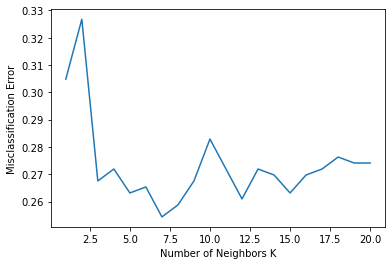

In [76]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,21,1), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### For K = 7 it is giving the best test accuracy. Lets check train and test both with other evaluation metrics. And we have already ran the k=7 model and saw that the train and test accuracy difference is around 9.5% which is less than industry allowable.

### So, we will keep this (KNN_model_tuned) model for further analysis......

## ======= Tuning Gaussian Naïve Bayes Model ===========

### Basically, there are no hyper parameters to tune Gaussian NB model. Still we can tune with 'var_smoothing' parameter as below.

In [77]:
NB_clf = GaussianNB(priors= (0.1,0.9))  # (0,1) / (0.1,0.9) / (0.2,0.8) can be applied and checked

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
NB_tuned = GridSearchCV(estimator=NB_clf, 
                 param_grid=params_NB, 
                 verbose=1, 
                 scoring='accuracy') 
NB_tuned.fit(X_train, y_train)

NB_tuned.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 0.001}

In [78]:
y_train_predict = NB_tuned.predict(X_train)
y_test_predict = NB_tuned.predict(X_test)

In [79]:
print ("Classification report for Training data")
print(classification_report(y_train,y_train_predict))

print ('\n')

print ("Classification report for Testing data")
print(classification_report(y_test, y_test_predict))

Classification report for Training data
              precision    recall  f1-score   support

           0       0.73      0.66      0.70       315
           1       0.86      0.90      0.88       746

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.83      1061



Classification report for Testing data
              precision    recall  f1-score   support

           0       0.66      0.58      0.62       145
           1       0.81      0.86      0.84       311

    accuracy                           0.77       456
   macro avg       0.74      0.72      0.73       456
weighted avg       0.77      0.77      0.77       456



### ***  Tuned NB Model performs better than the untuned model.

## There are some more techniques like SMOTE, cross validation to check model perfomances based on Imbalanced data, train/test result optimization. 
## So, here we will apply SMOTE on all the models to check if the performance has improved or not.

### Preparing the training set for SMOTE (SMOTE is only applied on the train data set)

In [80]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 7, random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [81]:
print("Before UpSampling, counts of label '0': {}".format((y_train==0).sum()))
print("Before UpSampling, counts of label '1': {} \n".format((y_train==1).sum()))

Before UpSampling, counts of label '0': vote    315
dtype: int64
Before UpSampling, counts of label '1': vote    746
dtype: int64 



In [82]:
print("After UpSampling, counts of label '0': {}".format((y_train_res==0).sum()))
print("After UpSampling, counts of label '1': {} \n".format((y_train_res==1).sum()))


After UpSampling, counts of label '0': vote    746
dtype: int64
After UpSampling, counts of label '1': vote    746
dtype: int64 



In [83]:
print("Resampled X_train data shape ", X_train_res.shape)
print("Resampled y_train data shape ", y_train_res.shape)


Resampled X_train data shape  (1492, 31)
Resampled y_train data shape  (1492, 1)


#### =======================================================================================
### Logistic Regression Model with SMOTE
#### =======================================================================================

In [84]:
#model_logistic.fit(X_train_res, y_train_res)
Logistic_tuned.fit(X_train_res, y_train_res)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=123),
             param_grid={'max_iter': [500, 1000], 'n_jobs': [1, 2],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [85]:
y_train_predict_res = Logistic_tuned.predict(X_train_res)
y_test_predict = Logistic_tuned.predict(X_test)

In [86]:
Logistic_tuned.score(X_train_res, y_train_res)

0.8739946380697051

In [87]:
Logistic_tuned.score(X_test, y_test)

0.7807017543859649

In [88]:
print ("Classification report for Training data")
print(classification_report(y_train_res,y_train_predict_res))

print ('\n')

print ("Classification report for Testing data")
print(classification_report(y_test, y_test_predict))

Classification report for Training data
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       746
           1       0.88      0.87      0.87       746

    accuracy                           0.87      1492
   macro avg       0.87      0.87      0.87      1492
weighted avg       0.87      0.87      0.87      1492



Classification report for Testing data
              precision    recall  f1-score   support

           0       0.66      0.64      0.65       145
           1       0.83      0.85      0.84       311

    accuracy                           0.78       456
   macro avg       0.75      0.74      0.75       456
weighted avg       0.78      0.78      0.78       456



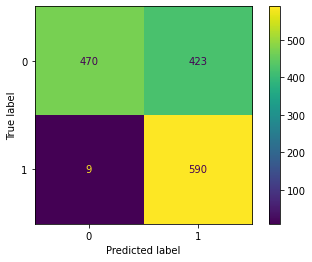

In [216]:
plot_confusion_matrix(Logistic_tuned,X_train_res,y_train_predict_res)

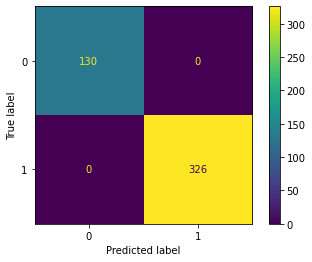

In [217]:
plot_confusion_matrix(Logistic_tuned,X_test, y_test_predict)

#### =======================================================================================
### LDA Model with SMOTE
#### =======================================================================================

In [89]:
Best_LDA.fit(X_train_res, y_train_res)

GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(),
             param_grid={'shrinkage': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                       0.8, 0.9, 1],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 0.001, 1e-05]},
             scoring='accuracy')

In [90]:
y_train_predict_res = Best_LDA.predict(X_train_res)
y_test_predict = Best_LDA.predict(X_test)

In [91]:
Best_LDA.score(X_train_res, y_train_res)

0.8719839142091153

In [92]:
Best_LDA.score(X_test, y_test)

0.7785087719298246

In [93]:
print ("Classification report for Training data")
print(classification_report(y_train_res,y_train_predict_res))

print ('\n')

print ("Classification report for Testing data")
print(classification_report(y_test, y_test_predict))

Classification report for Training data
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       746
           1       0.88      0.86      0.87       746

    accuracy                           0.87      1492
   macro avg       0.87      0.87      0.87      1492
weighted avg       0.87      0.87      0.87      1492



Classification report for Testing data
              precision    recall  f1-score   support

           0       0.66      0.63      0.65       145
           1       0.83      0.85      0.84       311

    accuracy                           0.78       456
   macro avg       0.74      0.74      0.74       456
weighted avg       0.78      0.78      0.78       456



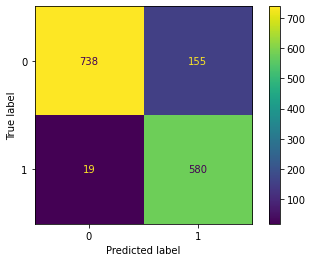

In [218]:
plot_confusion_matrix(Best_LDA,X_train_res,y_train_predict_res)

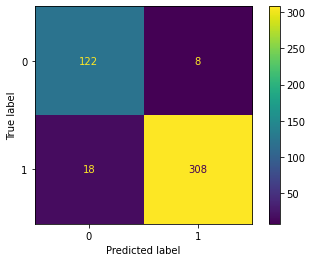

In [219]:
plot_confusion_matrix(Best_LDA,X_test, y_test_predict)

#### =======================================================================================
### KNN Model with SMOTE
#### =======================================================================================

In [94]:
KNN_model_tuned.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=7)

In [95]:
y_train_predict_res = KNN_model_tuned.predict(X_train_res)
y_test_predict = KNN_model_tuned.predict(X_test)

In [96]:
KNN_model_tuned.score(X_train_res, y_train_res)

0.8337801608579088

In [97]:
KNN_model_tuned.score(X_test, y_test)

0.6096491228070176

In [100]:
print ("Classification report for Training data")
print(classification_report(y_train_res,y_train_predict_res))

print ('\n')

print ("Classification report for Testing data")
print(classification_report(y_test, y_test_predict))

Classification report for Training data
              precision    recall  f1-score   support

           0       0.76      0.97      0.85       746
           1       0.96      0.70      0.81       746

    accuracy                           0.83      1492
   macro avg       0.86      0.83      0.83      1492
weighted avg       0.86      0.83      0.83      1492



Classification report for Testing data
              precision    recall  f1-score   support

           0       0.43      0.70      0.53       145
           1       0.80      0.57      0.66       311

    accuracy                           0.61       456
   macro avg       0.62      0.63      0.60       456
weighted avg       0.68      0.61      0.62       456



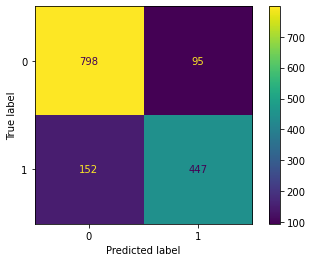

In [230]:
plot_confusion_matrix(KNN_model_tuned,X_train_res,y_train_predict_res)

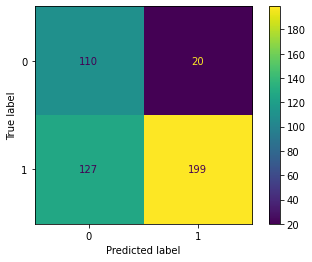

In [231]:
plot_confusion_matrix(KNN_model_tuned,X_test, y_test_predict)

## ======= Gaussian Naïve Bayes Model with SMOTE ===========

In [101]:
NB_tuned.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3101297...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [103]:
y_train_predict_res = NB_tuned.predict(X_train_res)
y_test_predict = NB_tuned.predict(X_test)

In [104]:
NB_tuned.score(X_train_res, y_train_res)

0.8237265415549598

In [105]:
NB_tuned.score(X_test, y_test)

0.7039473684210527

In [106]:
print ("Classification report for Training data")
print(classification_report(y_train_res,y_train_predict_res))

print ('\n')

print ("Classification report for Testing data")
print(classification_report(y_test, y_test_predict))

Classification report for Training data
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       746
           1       0.90      0.73      0.80       746

    accuracy                           0.82      1492
   macro avg       0.84      0.82      0.82      1492
weighted avg       0.84      0.82      0.82      1492



Classification report for Testing data
              precision    recall  f1-score   support

           0       0.52      0.77      0.62       145
           1       0.86      0.68      0.76       311

    accuracy                           0.70       456
   macro avg       0.69      0.72      0.69       456
weighted avg       0.75      0.70      0.71       456



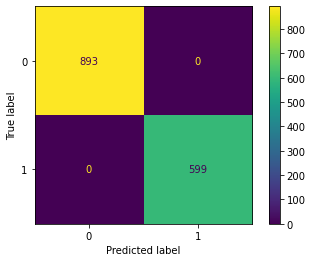

In [232]:
plot_confusion_matrix(NB_tuned,X_train_res,y_train_predict_res)

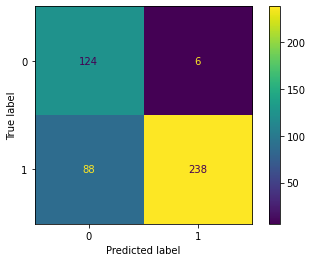

In [233]:
plot_confusion_matrix(NB_tuned,X_test, y_test_predict)

## =========   Bagging with Random Forest classifier   =============

In [107]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=rfcl,n_estimators=500,random_state=5)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=500,
                  random_state=5)

In [108]:
y_train_predict = Bagging_model.predict(X_train)
y_test_predict = Bagging_model.predict(X_test)

In [109]:
Bagging_model.score(X_train, y_train)

0.9783223374175306

In [110]:
Bagging_model.score(X_test, y_test)

0.793859649122807

In [111]:
print ("Classification report for Training data")
print(classification_report(y_train,y_train_predict))

print ('\n')

print ("Classification report for Testing data")
print(classification_report(y_test, y_test_predict))

Classification report for Training data
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       315
           1       0.98      0.99      0.98       746

    accuracy                           0.98      1061
   macro avg       0.98      0.97      0.97      1061
weighted avg       0.98      0.98      0.98      1061



Classification report for Testing data
              precision    recall  f1-score   support

           0       0.70      0.62      0.66       145
           1       0.83      0.87      0.85       311

    accuracy                           0.79       456
   macro avg       0.76      0.75      0.75       456
weighted avg       0.79      0.79      0.79       456



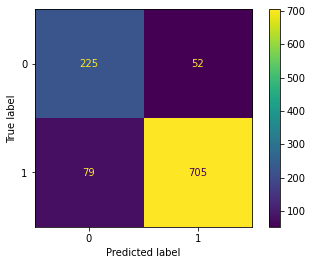

In [234]:
plot_confusion_matrix(Bagging_model,X_train,y_train_predict)

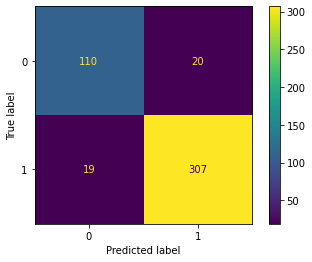

In [235]:
plot_confusion_matrix(Bagging_model,X_test, y_test_predict)

## ================= Gradient Boosting  ===================

In [112]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [113]:
y_train_predict = gbcl.predict(X_train)
y_test_predict = gbcl.predict(X_test)

In [114]:
gbcl.score(X_train, y_train)

0.8991517436380773

In [115]:
gbcl.score(X_test, y_test)

0.7916666666666666

In [116]:
print ("Classification report for Training data")
print(classification_report(y_train,y_train_predict))

print ('\n')

print ("Classification report for Testing data")
print(classification_report(y_test, y_test_predict))

Classification report for Training data
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       315
           1       0.91      0.95      0.93       746

    accuracy                           0.90      1061
   macro avg       0.89      0.87      0.88      1061
weighted avg       0.90      0.90      0.90      1061



Classification report for Testing data
              precision    recall  f1-score   support

           0       0.69      0.62      0.65       145
           1       0.83      0.87      0.85       311

    accuracy                           0.79       456
   macro avg       0.76      0.75      0.75       456
weighted avg       0.79      0.79      0.79       456



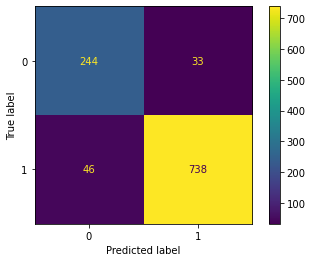

In [236]:
plot_confusion_matrix(gbcl,X_train,y_train_predict)

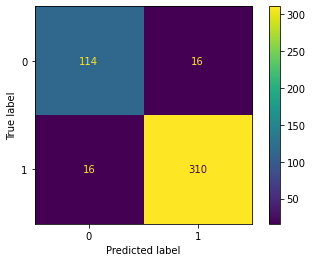

In [237]:
plot_confusion_matrix(gbcl,X_test, y_test_predict)

## ================= Ada Boosting  ===================


In [117]:
from sklearn.ensemble import AdaBoostClassifier

ADB_model = AdaBoostClassifier(n_estimators=100,random_state=20)

ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=20)

In [118]:
y_train_predict = ADB_model.predict(X_train)
y_test_predict = ADB_model.predict(X_test)

In [119]:
ADB_model.score(X_train, y_train)

0.8548539114043355

In [120]:
ADB_model.score(X_test, y_test)

0.793859649122807

In [121]:
print ("Classification report for Training data")
print(classification_report(y_train,y_train_predict))

print ('\n')

print ("Classification report for Testing data")
print(classification_report(y_test, y_test_predict))

Classification report for Training data
              precision    recall  f1-score   support

           0       0.79      0.69      0.74       315
           1       0.88      0.92      0.90       746

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



Classification report for Testing data
              precision    recall  f1-score   support

           0       0.69      0.63      0.66       145
           1       0.83      0.87      0.85       311

    accuracy                           0.79       456
   macro avg       0.76      0.75      0.76       456
weighted avg       0.79      0.79      0.79       456



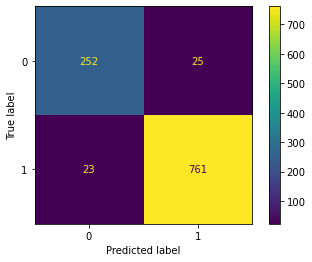

In [238]:
plot_confusion_matrix(ADB_model,X_train,y_train_predict)

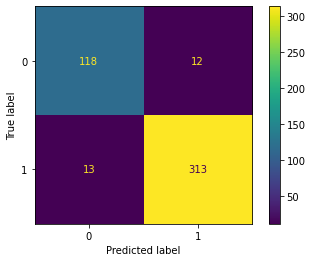

In [239]:
plot_confusion_matrix(ADB_model,X_test, y_test_predict)

In [162]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ADB_model, X_train, y_train, cv=10)
scores

array([0.81308411, 0.82075472, 0.83962264, 0.80188679, 0.82075472,
       0.91509434, 0.8490566 , 0.8490566 , 0.8490566 , 0.81132075])

In [163]:
scores = cross_val_score(ADB_model, X_test, y_test, cv=10)
scores

array([0.73913043, 0.63043478, 0.73913043, 0.7173913 , 0.89130435,
       0.7826087 , 0.73333333, 0.8       , 0.75555556, 0.77777778])

In [165]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Logistic_tuned, X_train_res, y_train_res, cv=5)
scores

array([0.7458194 , 0.76923077, 0.88255034, 0.91275168, 0.90268456])

In [166]:
scores = cross_val_score(Logistic_tuned, X_test, y_test, cv=5)
scores

array([0.70652174, 0.71428571, 0.84615385, 0.79120879, 0.79120879])

## Question 1.7)  Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model . Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Answer 1.7:


### Please refer to the already ran Algorithms above..

#### Only the tuned/optimized model performance is reported here.

### AUC and ROC for the Training data - Logistic regression

Area under Curve (AUC) is: 0.882


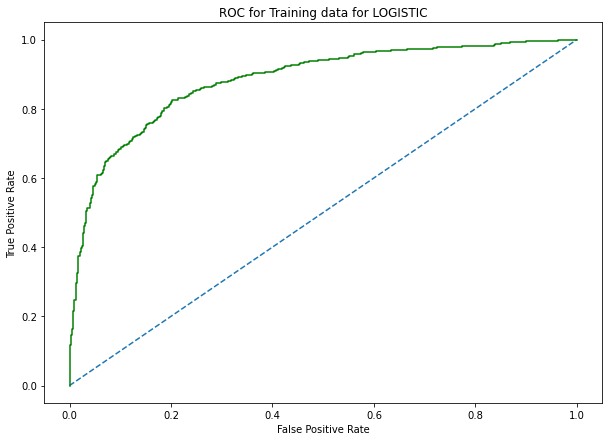

In [226]:
plt.figure(figsize=(10,7))
probs_LOG = Logistic_tuned.predict_proba(X_train_res)
probs_LOG = probs_LOG[:, 1]
# calculate AUC
LOG_train_auc = roc_auc_score(y_train_res, probs_LOG)
print('Area under Curve (AUC) is: %.3f' % LOG_train_auc)
# calculate roc curve
LOG_train_fpr, LOG_train_tpr, LOG_train_thresholds = roc_curve(y_train_res, probs_LOG)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(LOG_train_fpr, LOG_train_tpr,color='green')
plt.title('ROC for Training data for LOGISTIC')
plt.show()

### AUC and ROC for the Testing data - Logistic regression

Area under Curve (AUC) is: 0.834


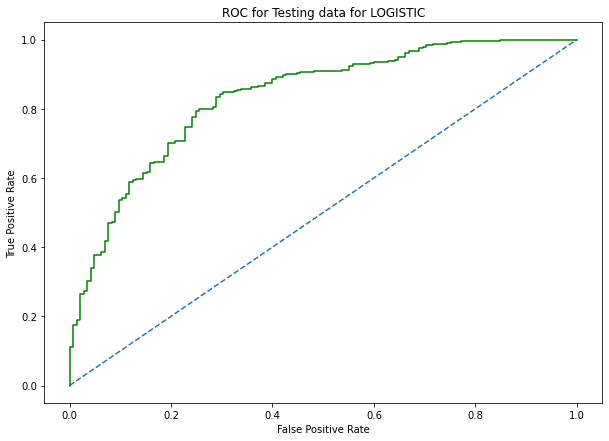

In [221]:
plt.figure(figsize=(10,7))
probs_LOG_t = Logistic_tuned.predict_proba(X_test)
probs_LOG_t = probs_LOG_t[:, 1]
# calculate AUC
LOG_test_auc = roc_auc_score(y_test, probs_LOG_t)
print('Area under Curve (AUC) is: %.3f' % LOG_test_auc)
# calculate roc curve
LOG_test_fpr, LOG_test_tpr, LOG_test_thresholds = roc_curve(y_test, probs_LOG_t)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(LOG_test_fpr, LOG_test_tpr,color='green')
plt.title('ROC for Testing data for LOGISTIC')
plt.show()

### AUC and ROC for the LDA

Area under Curve (AUC) is: 0.940


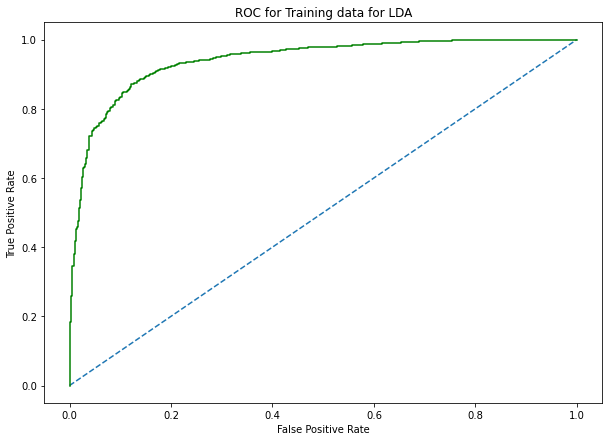

In [223]:
plt.figure(figsize=(10,7))
probs_LDA = Best_LDA.predict_proba(X_train_res)
probs_LDA = probs_LDA[:, 1]
# calculate AUC
LDA_train_auc = roc_auc_score(y_train_res, probs_LDA)
print('Area under Curve (AUC) is: %.3f' % LDA_train_auc)
# calculate roc curve
LDA_train_fpr, LDA_train_tpr, LDA_train_thresholds = roc_curve(y_train_res, probs_LDA)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(LDA_train_fpr, LDA_train_tpr,color='green')
plt.title('ROC for Training data for LDA')
plt.show()

Area under Curve (AUC) is: 0.802


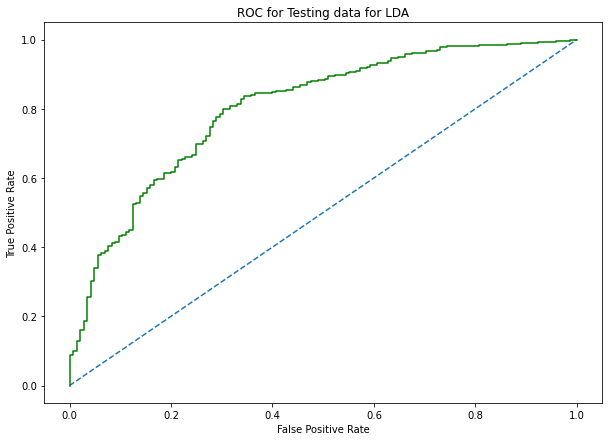

In [224]:
plt.figure(figsize=(10,7))
probs_LDA_t = Best_LDA.predict_proba(X_test)
probs_LDA_t = probs_LDA_t[:, 1]
# calculate AUC
LDA_test_auc = roc_auc_score(y_test, probs_LDA_t)
print('Area under Curve (AUC) is: %.3f' % LDA_test_auc)
# calculate roc curve
LDA_test_fpr, LDA_test_tpr, LDA_test_thresholds = roc_curve(y_test, probs_LDA_t)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(LDA_test_fpr, LDA_test_tpr,color='green')
plt.title('ROC for Testing data for LDA')
plt.show()

### AUC and ROC for the KNN 

Area under Curve (AUC) is: 0.948


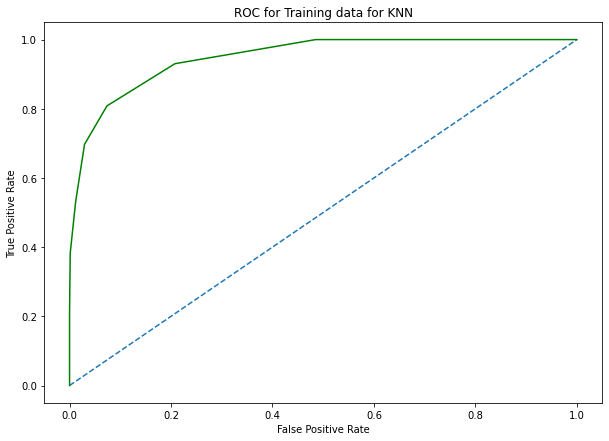

In [137]:
plt.figure(figsize=(10,7))
probs_KNN = KNN_model_tuned.predict_proba(X_train_res)
probs_KNN = probs_KNN[:, 1]
# calculate AUC
KNN_train_auc = roc_auc_score(y_train_res, probs_KNN)
print('Area under Curve (AUC) is: %.3f' % KNN_train_auc)
# calculate roc curve
KNN_train_fpr, KNN_train_tpr, KNN_train_thresholds = roc_curve(y_train_res, probs_KNN)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(KNN_train_fpr, KNN_train_tpr,color='green')
plt.title('ROC for Training data for KNN')
plt.show()

Area under Curve (AUC) is: 0.704


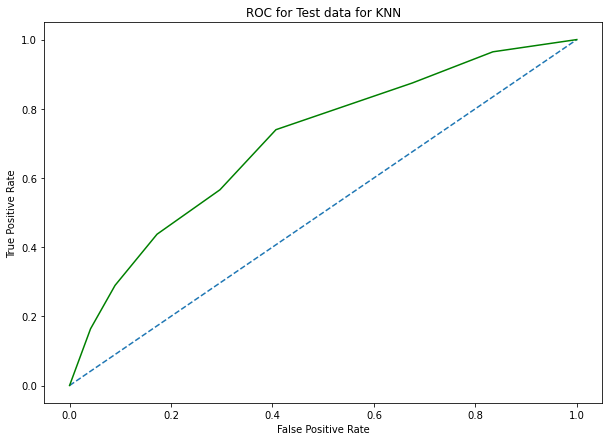

In [136]:
plt.figure(figsize=(10,7))
probs_KNN_t = KNN_model_tuned.predict_proba(X_test)
probs_KNN_t = probs_KNN_t[:, 1]
# calculate AUC
KNN_test_auc = roc_auc_score(y_test, probs_KNN_t)
print('Area under Curve (AUC) is: %.3f' % KNN_test_auc)
# calculate roc curve
KNN_test_fpr, KNN_test_tpr, KNN_test_thresholds = roc_curve(y_test, probs_KNN_t)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(KNN_test_fpr, KNN_test_tpr,color='green')
plt.title('ROC for Test data for KNN')
plt.show()

### AUC and ROC for the Naive Bayes

Area under Curve (AUC) is: 0.909


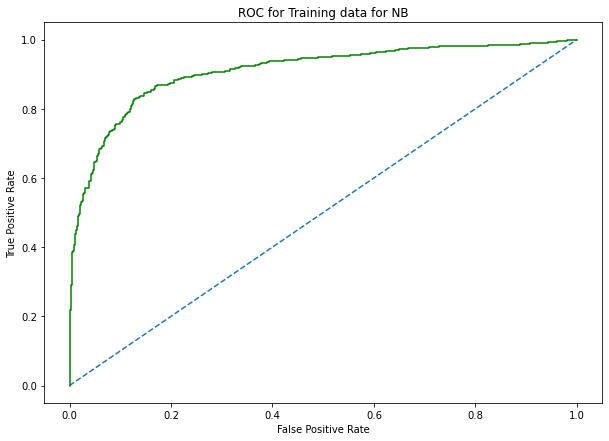

In [142]:
plt.figure(figsize=(10,7))
probs_NB = NB_tuned.predict_proba(X_train_res)
probs_NB = probs_NB[:, 1]
# calculate AUC
NB_train_auc = roc_auc_score(y_train_res, probs_NB)
print('Area under Curve (AUC) is: %.3f' % NB_train_auc)
# calculate roc curve
NB_train_fpr, NB_train_tpr, NB_train_thresholds = roc_curve(y_train_res, probs_NB)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(NB_train_fpr, NB_train_tpr,color='green')
plt.title('ROC for Training data for NB')
plt.show()

Area under Curve (AUC) is: 0.799


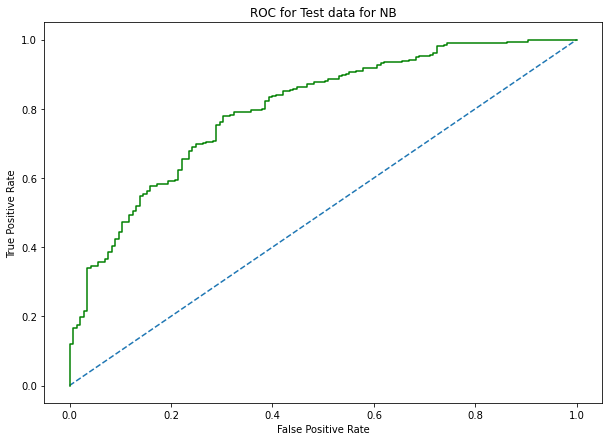

In [145]:
plt.figure(figsize=(10,7))
probs_NB_t = NB_tuned.predict_proba(X_test)
probs_NB_t = probs_NB_t[:, 1]
# calculate AUC
NB_test_auc = roc_auc_score(y_test, probs_NB_t)
print('Area under Curve (AUC) is: %.3f' % NB_test_auc)
# calculate roc curve
NB_test_fpr, NB_test_tpr, NB_test_thresholds = roc_curve(y_test, probs_NB_t)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(NB_test_fpr, NB_test_tpr,color='green')
plt.title('ROC for Test data for NB')
plt.show()

### AUC and ROC for the Bagging

Area under Curve (AUC) is: 0.999


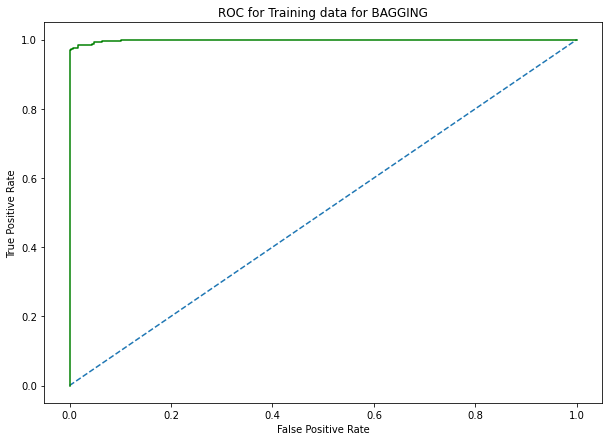

In [148]:
plt.figure(figsize=(10,7))
probs_BAG = Bagging_model.predict_proba(X_train)
probs_BAG = probs_BAG[:, 1]
# calculate AUC
BAG_train_auc = roc_auc_score(y_train, probs_BAG)
print('Area under Curve (AUC) is: %.3f' % BAG_train_auc)
# calculate roc curve
BAG_train_fpr, BAG_train_tpr, BAG_train_thresholds = roc_curve(y_train, probs_BAG)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(BAG_train_fpr, BAG_train_tpr,color='green')
plt.title('ROC for Training data for BAGGING')
plt.show()

Area under Curve (AUC) is: 0.823


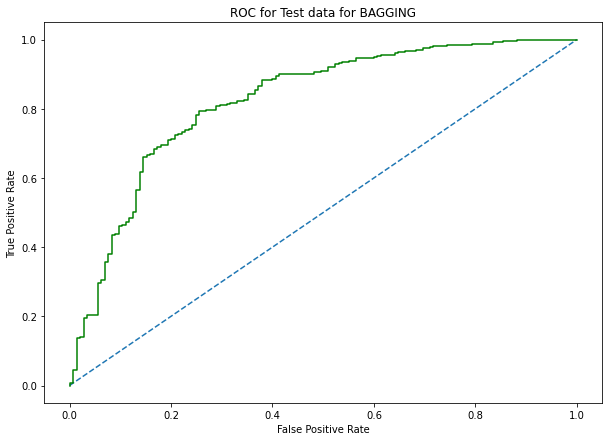

In [149]:
plt.figure(figsize=(10,7))
probs_BAG_t = Bagging_model.predict_proba(X_test)
probs_BAG_t = probs_BAG_t[:, 1]
# calculate AUC
BAG_test_auc = roc_auc_score(y_test, probs_BAG_t)
print('Area under Curve (AUC) is: %.3f' % BAG_test_auc)
# calculate roc curve
BAG_test_fpr, BAG_test_tpr, BAG_test_thresholds = roc_curve(y_test, probs_BAG_t)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(BAG_test_fpr, BAG_test_tpr,color='green')
plt.title('ROC for Test data for BAGGING')
plt.show()

### AUC and ROC for the Gradient Boosting

Area under Curve (AUC) is: 0.958


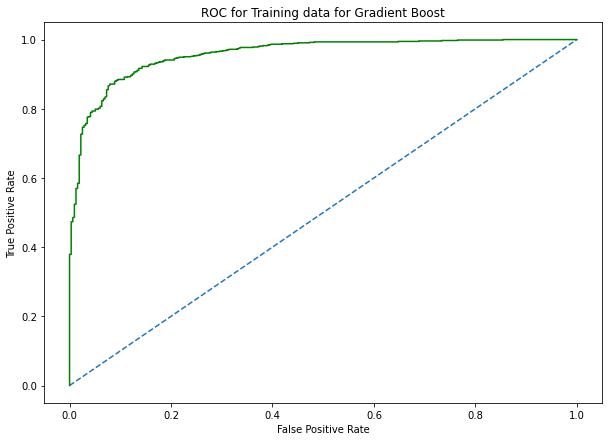

In [152]:
plt.figure(figsize=(10,7))
probs_GB = gbcl.predict_proba(X_train)
probs_GB = probs_GB[:, 1]
# calculate AUC
GB_train_auc = roc_auc_score(y_train, probs_GB)
print('Area under Curve (AUC) is: %.3f' % GB_train_auc)
# calculate roc curve
GB_train_fpr, GB_train_tpr, GB_train_thresholds = roc_curve(y_train, probs_GB)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(GB_train_fpr, GB_train_tpr,color='green')
plt.title('ROC for Training data for Gradient Boost')
plt.show()

Area under Curve (AUC) is: 0.840


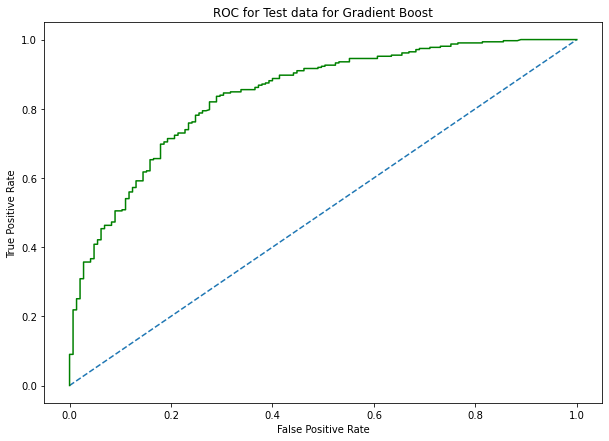

In [153]:
plt.figure(figsize=(10,7))
probs_GB_t = gbcl.predict_proba(X_test)
probs_GB_t = probs_GB_t[:, 1]
# calculate AUC
GB_test_auc = roc_auc_score(y_test, probs_GB_t)
print('Area under Curve (AUC) is: %.3f' % GB_test_auc)
# calculate roc curve
GB_test_fpr, GB_test_tpr, GB_test_thresholds = roc_curve(y_test, probs_GB_t)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(GB_test_fpr, GB_test_tpr,color='green')
plt.title('ROC for Test data for Gradient Boost')
plt.show()

### AUC and ROC for the ADA Boosting

Area under Curve (AUC) is: 0.929


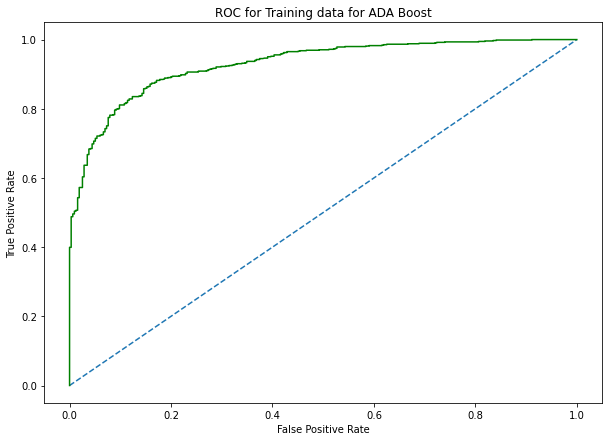

In [156]:
plt.figure(figsize=(10,7))
probs_ADA = ADB_model.predict_proba(X_train)
probs_ADA = probs_ADA[:, 1]
# calculate AUC
ADA_train_auc = roc_auc_score(y_train, probs_ADA)
print('Area under Curve (AUC) is: %.3f' % ADA_train_auc)
# calculate roc curve
ADA_train_fpr, ADA_train_tpr, ADA_train_thresholds = roc_curve(y_train, probs_ADA)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(ADA_train_fpr, ADA_train_tpr,color='green')
plt.title('ROC for Training data for ADA Boost')
plt.show()



Area under Curve (AUC) is: 0.832


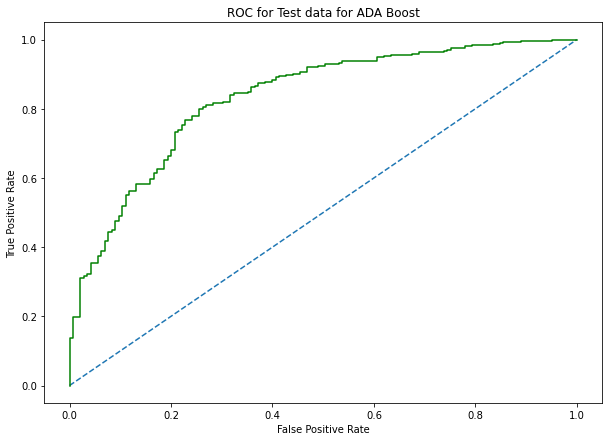

In [157]:
plt.figure(figsize=(10,7))
probs_ADA_t = ADB_model.predict_proba(X_test)
probs_ADA_t = probs_ADA_t[:, 1]
# calculate AUC
ADA_test_auc = roc_auc_score(y_test, probs_ADA_t)
print('Area under Curve (AUC) is: %.3f' % ADA_test_auc)
# calculate roc curve
ADA_test_fpr, ADA_test_tpr, ADA_test_thresholds = roc_curve(y_test, probs_ADA_t)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(ADA_test_fpr, ADA_test_tpr,color='green')
plt.title('ROC for Test data for ADA Boost')
plt.show()

### Tabulating all the performance matrix

In [229]:
index=  ['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
table = pd.DataFrame({'LOG_Reg Train':            [0.87,0.88,0.87,0.88,0.87],
        'LOG_Reg Test':[0.78,0.83,0.85,0.83,0.84],
        
        'LDA Train':                              [0.87,0.94,0.86,0.88,0.87],
        'LDA Test':[0.78,0.80,0.85,0.83,0.84],
             
        'KNN Train':                              [0.83,0.95,0.70,0.96,0.81],
        'KNN Test':[0.61,0.70,0.57,0.80,0.66],
                      
        'Naive Bayes Train':                      [0.82,0.91,0.73,0.90,0.80],
        'Naive Bayes Test':[0.70,0.80,0.68,0.86,0.76],   
                      
        'Bagging Train':                          [0.98,0.99,0.99,0.98,0.98],
        'Bagging Test':[0.79,0.82,0.87,0.83,0.85],             
         
        'Grad. Boost Train':                      [0.90,0.96,0.95,0.91,0.93],
        'Grad. Boost Test':[0.79,0.84,0.87,0.83,0.85],
                      
        'ADA Boost Train':                      [0.85,0.93,0.92,0.88,0.93],
        'ADA Boost Test':[0.79,0.83,0.87,0.83,0.85],               
                      
        },index=index)
round(table,2)

,LOG_Reg Train,LOG_Reg Test,LDA Train,LDA Test,KNN Train,KNN Test,Naive Bayes Train,Naive Bayes Test,Bagging Train,Bagging Test,Grad. Boost Train,Grad. Boost Test,ADA Boost Train,ADA Boost Test
Accuracy,0.87,0.78,0.87,0.78,0.83,0.61,0.82,0.70,0.98,0.79,0.90,0.79,0.85,0.79
AUC,0.88,0.83,0.94,0.80,0.95,0.70,0.91,0.80,0.99,0.82,0.96,0.84,0.93,0.83
Recall,0.87,0.85,0.86,0.85,0.70,0.57,0.73,0.68,0.99,0.87,0.95,0.87,0.92,0.87
Precision,0.88,0.83,0.88,0.83,0.96,0.80,0.90,0.86,0.98,0.83,0.91,0.83,0.88,0.83
F1 Score,0.87,0.84,0.87,0.84,0.81,0.66,0.80,0.76,0.98,0.85,0.93,0.85,0.93,0.85


#### Below is summary for all the models. Here models are evaluated based on Accuracy, AUC, Recall, Precision and F1 score.
##### We will check if there is consistency between train and test dataset by assuming <= 10% variation (industry standard) between the two sets.
1. Logistic regression and LDA performs similar in terms of accuracy (10% variation) and Recall for both the train and test set.
2. For KNN, Naive Bayes, Bagging and Gradient boosting algorithms, the train and test set accuracy varies more than 10%, though the Recall values are within 10% difference. So, there is an overfitting scenario in all these techniques.
3. F1 score variation for label 1 which is vote for "labour" party is less than 10% Except KNN and Bagging classifier for training and test set. 
4. From all the performance matrices, it is seen for ADA Boosting that there is a good consistency between train and test set except AUC value (10.7% variation), which is near acceptable limit.
5. So, we will consider ADA boosting as the most optimized model for this dataset.



## Question 1.8)  Based on these predictions, what are the insights?

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Answer 1.8:

### It is included in the business report..

